In [3]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn')
print("Setup Complete")

Setup Complete


In [4]:
data = pd.read_csv('table.csv')

In [5]:
current = data['current']
mag = data['magfield']
m, c = np.polyfit(current, mag, deg = 1)

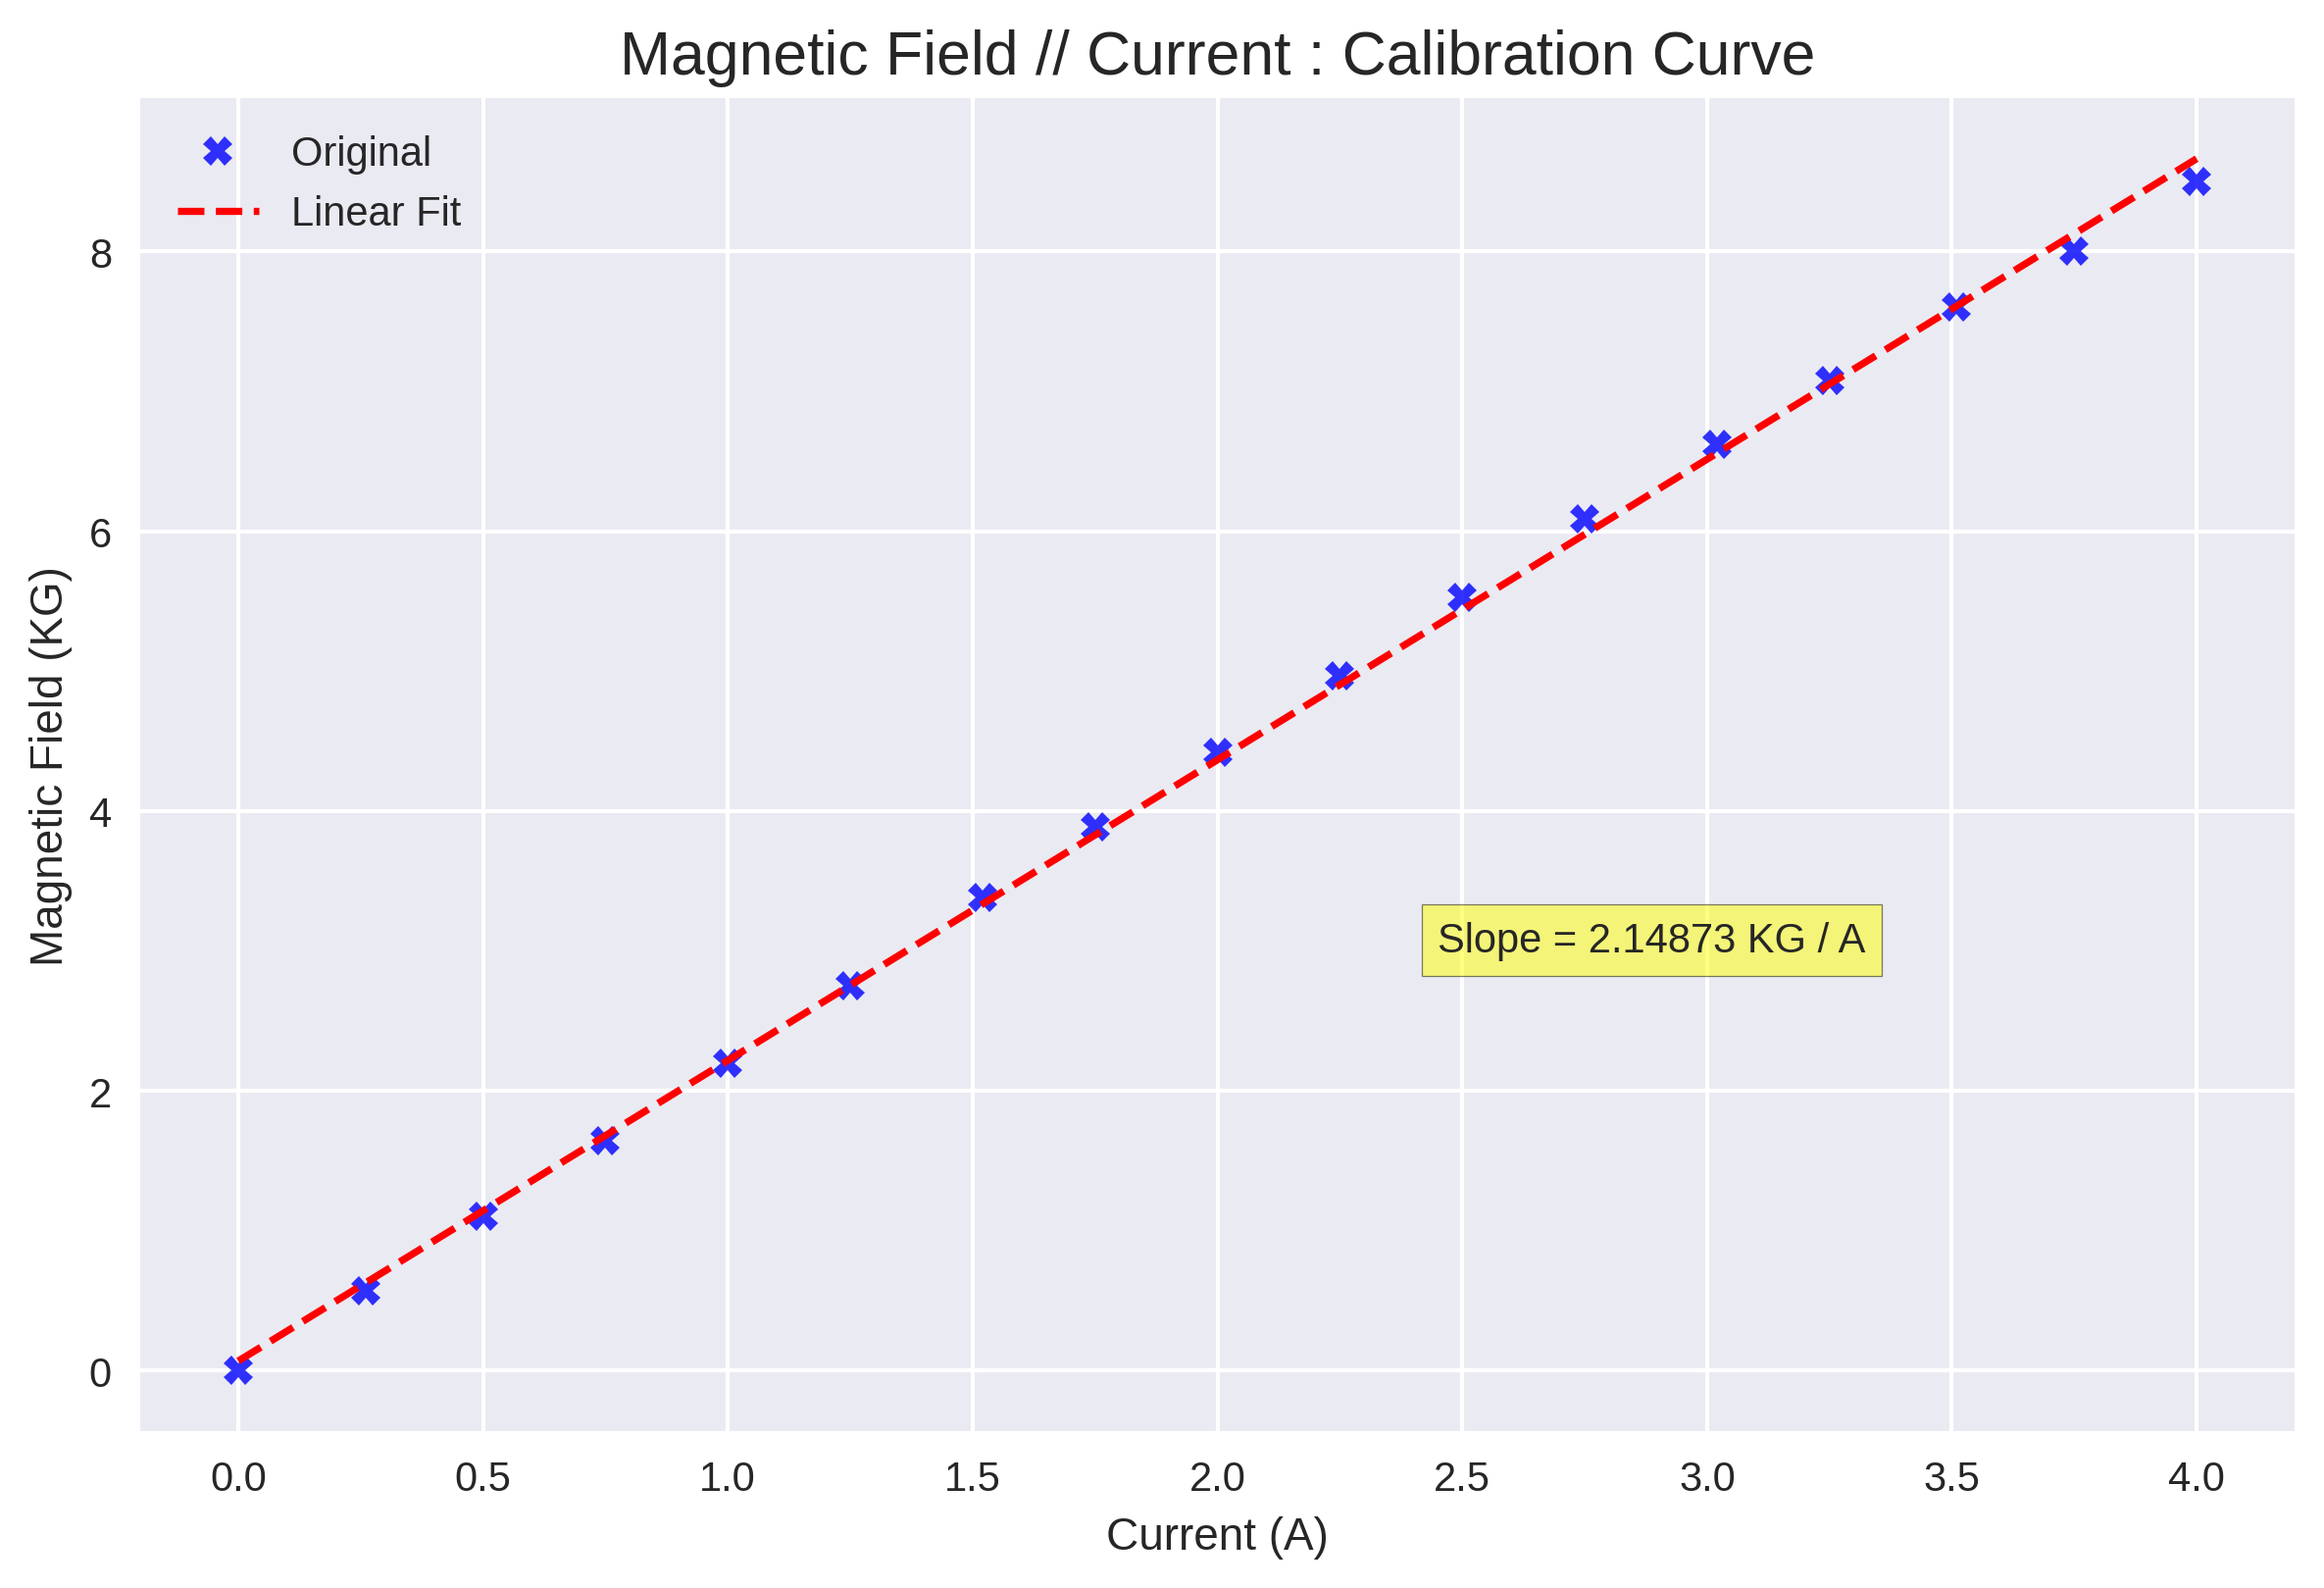

In [6]:
plt.plot(current,mag,'X',color = 'b',alpha = 0.8)
plt.plot(current, m*current + c,'--', color = 'red')

plt.text(2.45,3,'Slope = {} KG / A'.format(m.__round__(6)),bbox=dict(facecolor='yellow', alpha=0.5))

plt.legend(["Original","Linear Fit"])
plt.xlabel("Current (A)")
plt.ylabel("Magnetic Field (KG)")


plt.title('Magnetic Field // Current : Calibration Curve',fontsize = 15)
plt.tight_layout()

plt.savefig("Figure_1")

In [7]:
data_2 = pd.read_csv('table2.csv')
H2 = [x**2 for x in data_2['H'].values]
data_2["H2"] = H2

In [8]:
data_2

,current,H,hll,h,H2
0,0.0,0.000,15.02,0.00,0.000000
1,0.5,1.104,15.15,0.13,1.218816
2,1.0,2.200,15.19,0.17,4.840000
3,1.5,3.380,15.25,0.23,11.424400
4,2.0,4.420,15.80,0.78,19.536400
5,2.5,5.530,16.45,1.43,30.580900
6,3.0,6.620,17.00,1.98,43.824400
7,3.5,7.600,17.26,2.24,57.760000
8,4.0,8.500,17.91,2.89,72.250000


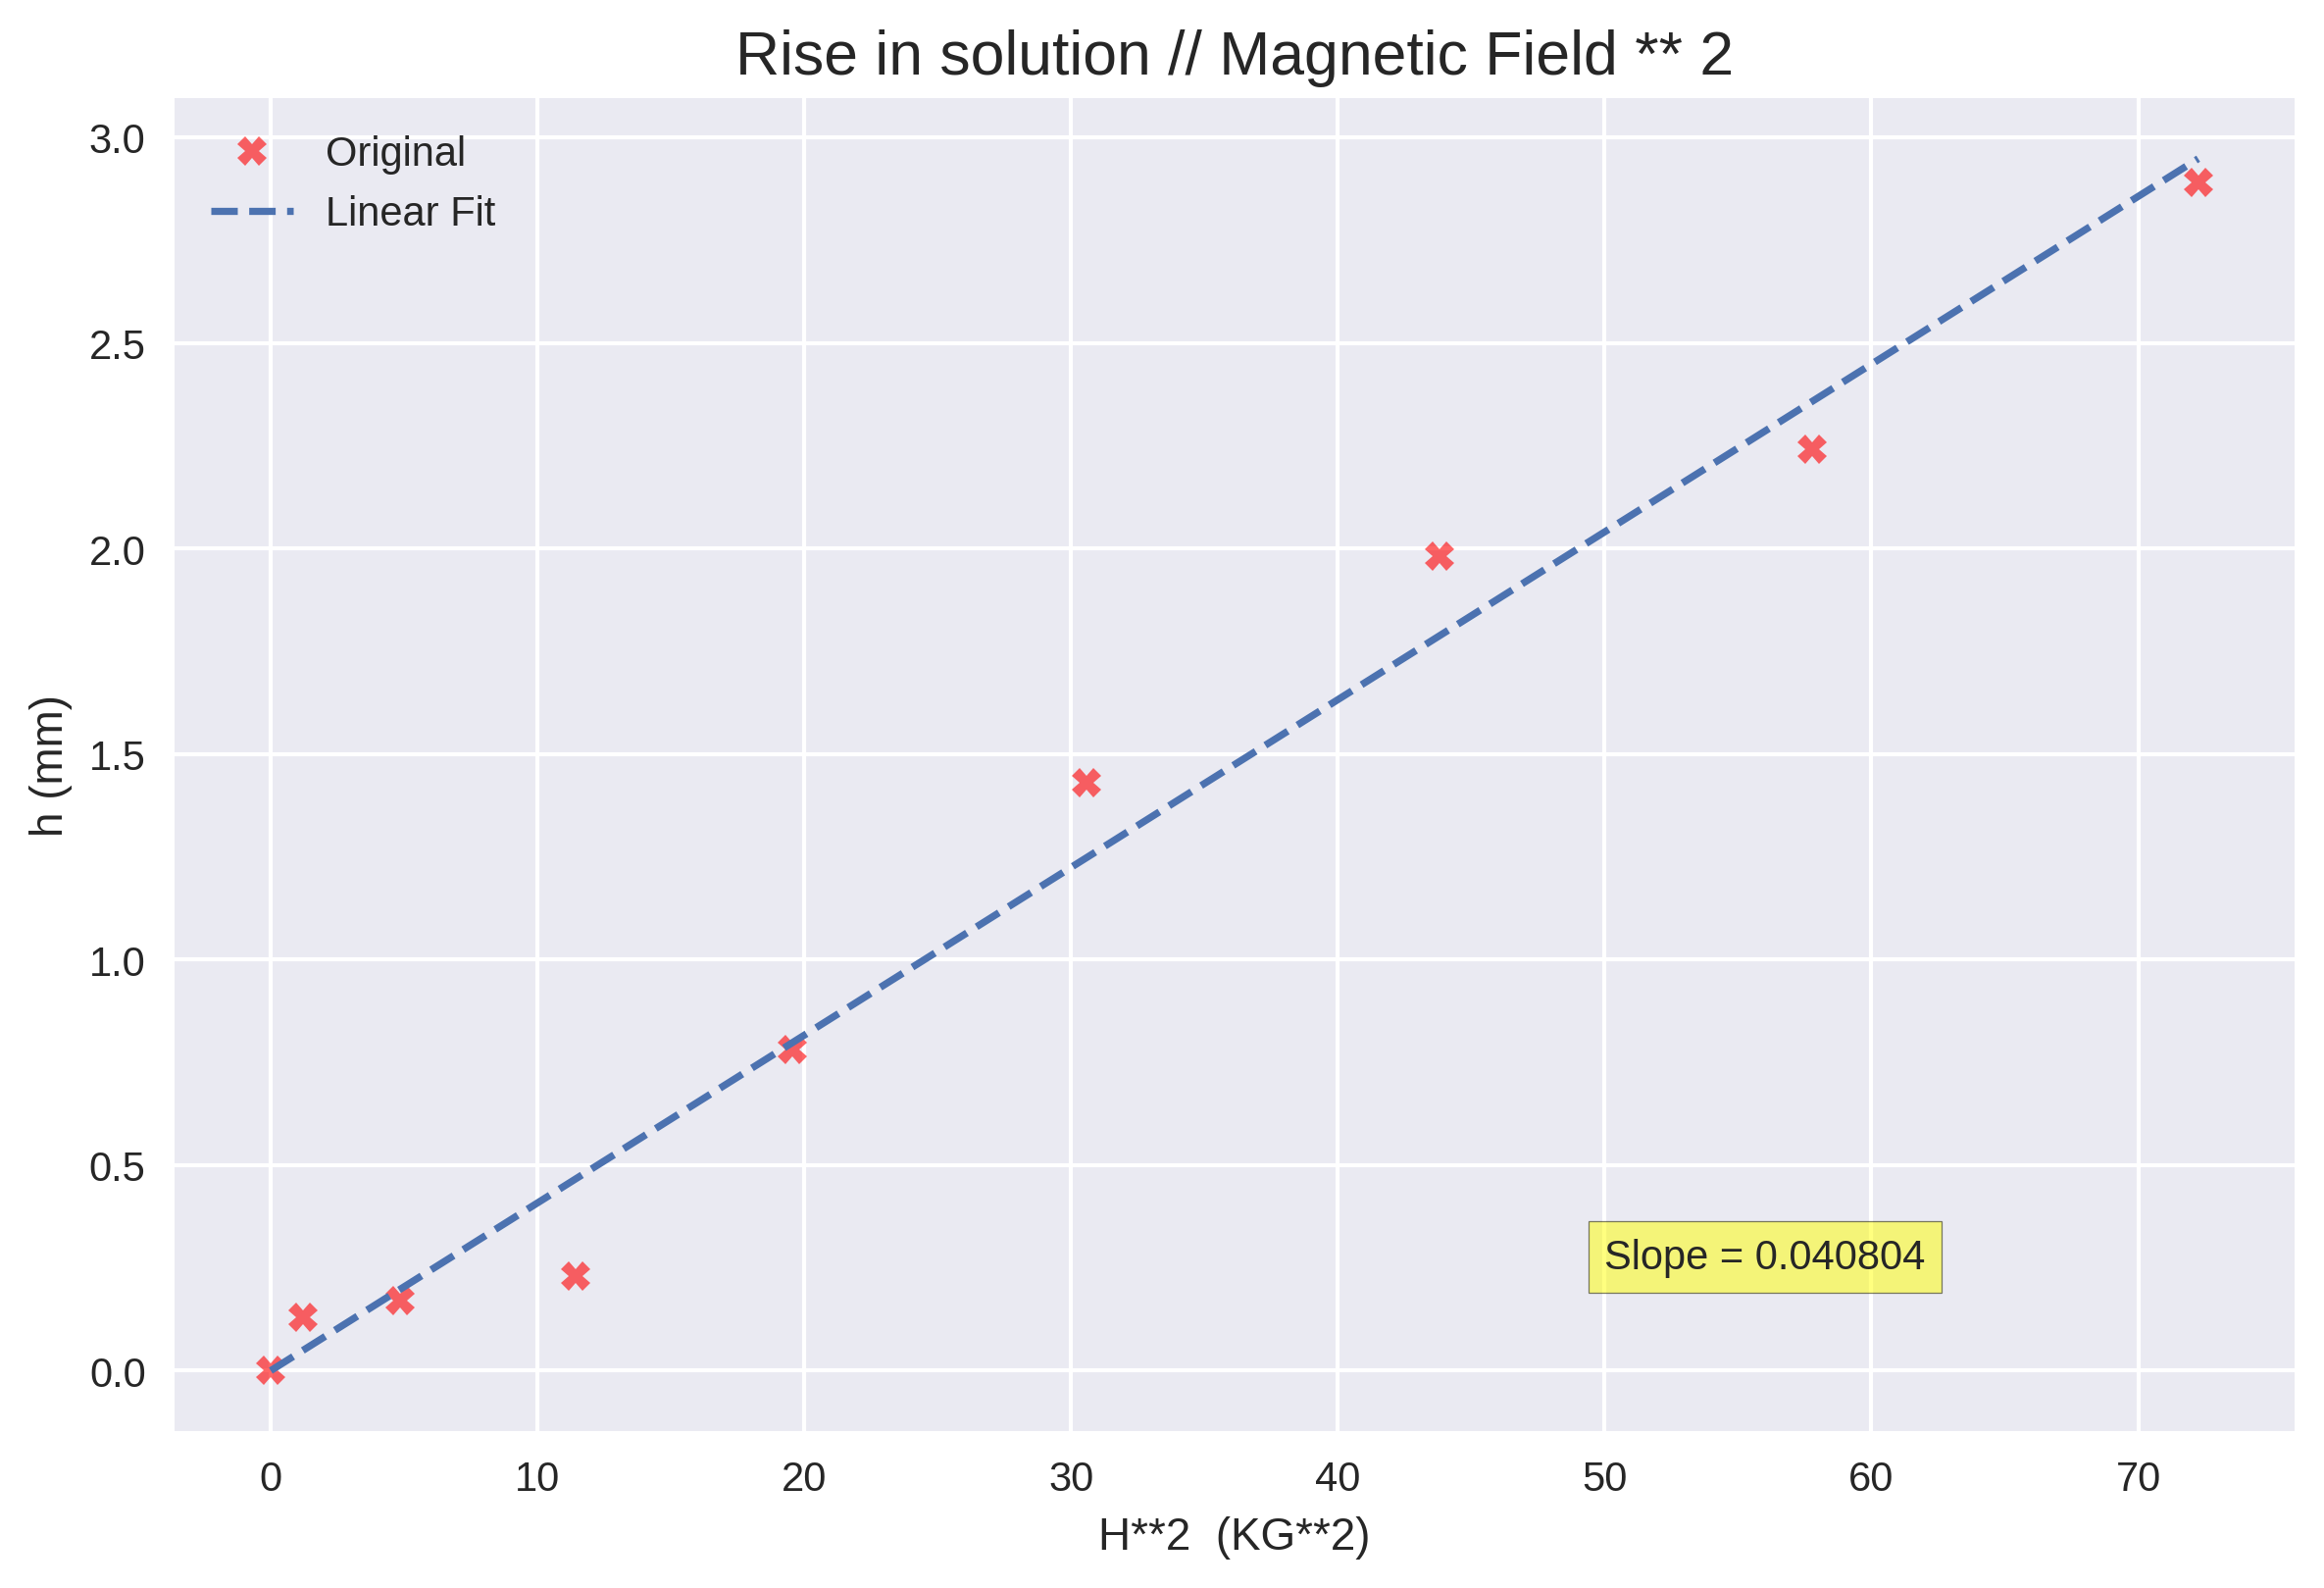

In [9]:
# plotting
H2 = data_2['H2']
h = data_2['h']

m2, c2 = np.polyfit(data_2['H2'],data_2['h'],deg = 1)

plt.plot(H2, h, 'X',alpha = 0.6,color = 'r')
plt.plot(H2, m2 * H2 + c2, '--')
plt.xlabel('H**2  (KG**2)')
plt.ylabel('h (mm)')

plt.text(50,0.25,'Slope = {}'.format(m2.__round__(6)),bbox=dict(facecolor='yellow', alpha=0.5))
plt.legend(["Original","Linear Fit"])
plt.title('Rise in solution // Magnetic Field ** 2',fontsize = 15)
plt.tight_layout()
plt.savefig('Figure_2')

In [10]:
slope = m2 * 10**-7
p = 1.107
g = 980
X = 2 * p * g * slope
slope

4.080447659938224e-09

In [11]:
X

8.853428896721163e-06

In [12]:
Xs = X/p
ms = 28.97
mw = 26.16

In [13]:
(Xs-((mw/(ms+mw))*-0.72*10**-6))*(ms+mw)/ms

1.5869767200728087e-05

In [14]:
1.5869767200728087e-05*169

0.0026819906569230468